In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import datetime

In [2]:
#Importing the Datasets
cab_data = pd.read_csv("C:/Users/mizoh/Desktop/Data Glacier/Datasets/Cab_data.csv")
trans_data = pd.read_csv("C:/Users/mizoh/Desktop/Data Glacier/Datasets/Transaction_ID.csv")
city_data = pd.read_csv("C:/Users/mizoh/Desktop/Data Glacier/Datasets/City.csv")
cust_data = pd.read_csv("C:/Users/mizoh/Desktop/Data Glacier/Datasets/Customer_ID.csv")

In [3]:
#Understanding Cab Data

In [4]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [6]:
cab_data.shape

(359392, 7)

In [7]:
#Understanding Transaction data

In [8]:
trans_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [10]:
trans_data.shape

(440098, 3)

In [11]:
#Understanding City Data

In [12]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
city_data.shape

(20, 3)

In [15]:
#Understanding Customer Data

In [16]:
cust_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [17]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
cust_data.shape

(49171, 4)

In [19]:
#Finding Missing Values 

In [20]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [21]:
trans_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [22]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [23]:
cust_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [24]:
for col in cab_data.columns:
    if ' 'in col:
        cab_data=cab_data.rename(columns={col:col.replace(' ','_')})

In [25]:
for col in trans_data.columns:
    if ' 'in col:
        trans_data=trans_data.rename(columns={col:col.replace(' ','_')})

In [26]:
for col in city_data.columns:
    if ' 'in col:
        city_data=city_data.rename(columns={col:col.replace(' ','_')})

In [27]:
for col in cust_data.columns:
    if ' 'in col:
        cust_data=cust_data.rename(columns={col:col.replace(' ','_')})

In [28]:
from datetime import datetime
cab_data['Date_of_Travel']=pd.to_datetime(cab_data['Date_of_Travel'])

In [29]:
months=[]
years=[]
for i in range(len(cab_data['Date_of_Travel'])):
               months.append(cab_data['Date_of_Travel'][i].month)
               years.append(cab_data['Date_of_Travel'][i].year)
cab_data['Month']=months
cab_data['Year']=years

In [30]:
cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016


In [31]:
cab_data.drop('Date_of_Travel',axis=1,inplace=True)

In [32]:
cab_data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016


In [33]:
#Before doing EDA, let's split the dataset into Pink Cab and Yellow Cab
PinkCab = cab_data[cab_data['Company']=='Pink Cab']
YellowCab = cab_data[cab_data['Company']=='Yellow Cab']

In [34]:
cab_data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016


In [35]:
plot0 = cab_data[cab_data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1     4734
2     4693
3     5724
4     5118
5     6150
6     6371
7     7048
8     8011
9     8518
10    9936
11    8679
12    9729
Name: Transaction_ID, dtype: int64

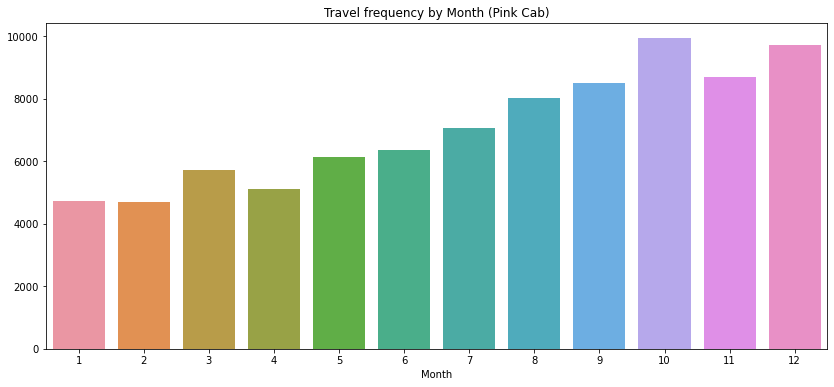

In [36]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Travel frequency by Month (Pink Cab)')
plt.show()

In [37]:
plot10 = cab_data[cab_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot10

Month
1     17108
2     17338
3     20754
4     19077
5     21309
6     20568
7     23177
8     24027
9     25377
10    29273
11    26538
12    30135
Name: Transaction_ID, dtype: int64

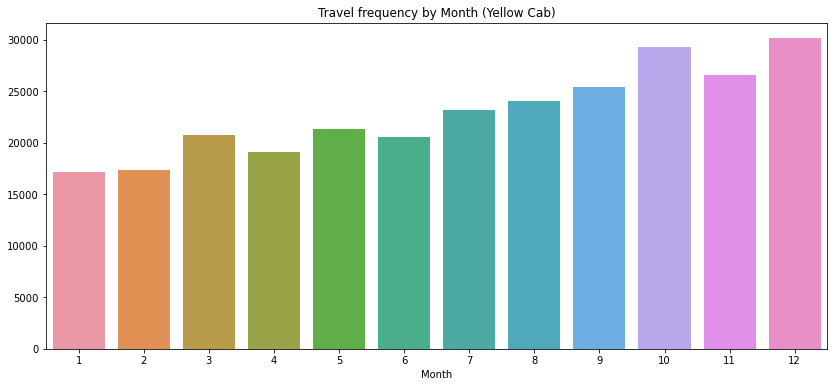

In [38]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot10.index,y=plot10.values)
plt.title('Travel frequency by Month (Yellow Cab)')
plt.show()

In [39]:
# Yellow cab has higher number of transaction (30135) compared to Pink cab (9729) in the Month of December which is a holiday month.

In [40]:
#Studying of the Distance Travelled:

In [41]:
overall_distance = cab_data['KM_Travelled'].describe()
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()

In [42]:
df=pd.DataFrame({'Overall':overall_distance.values,
                'PinkCab': PinkCab_distance.values,
                'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

,Overall,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,22.567254,22.559917,22.569517
Std. Dev.,12.233526,12.231092,12.234298
Min,1.900000,1.900000,1.900000
25%,12.000000,12.000000,11.990000
50%,22.440000,22.440000,22.440000
75%,32.960000,32.960000,32.960000
Max,48.000000,48.000000,48.000000


C:\Users\mizoh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

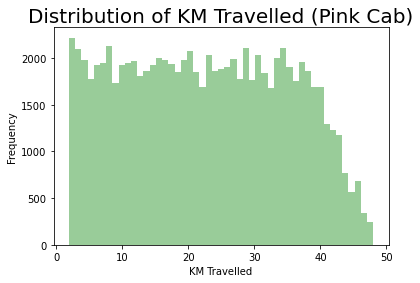

In [43]:
ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='green')
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20)
plt.xlabel("KM Travelled")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

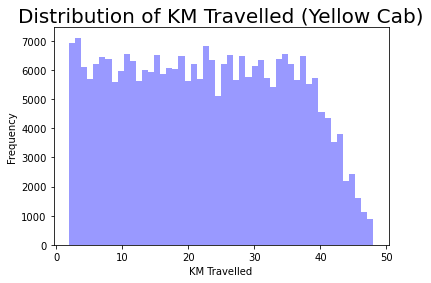

In [46]:
ax = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='blue')
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20)
plt.xlabel("KM Travelled")
plt.ylabel("Frequency")

In [47]:
#From the above graphs we can notice that the range of distance traveled in both cabs is between 2 KM and 48 KM

In [48]:
#Study of the Price Charged:

In [47]:
overall_price = cab_data['Price_Charged'].describe()
PinkCab_price = PinkCab['Price_Charged'].describe()
YellowCab_price = YellowCab['Price_Charged'].describe()

In [48]:
df1 = pd.DataFrame({'Overall': overall_price.values,
                  'PinkCab': PinkCab_price.values,
                  'YellowCab': YellowCab_price.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df1

,Overall,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,423.443311,310.800856,458.181990
Std. Dev.,274.378911,181.995661,288.386166
Min,15.600000,15.600000,20.730000
25%,206.437500,159.970000,226.680000
50%,386.360000,298.060000,425.060000
75%,583.660000,441.505000,633.880000
Max,2048.030000,1623.480000,2048.030000


C:\Users\mizoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mizoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Yellow Cab')

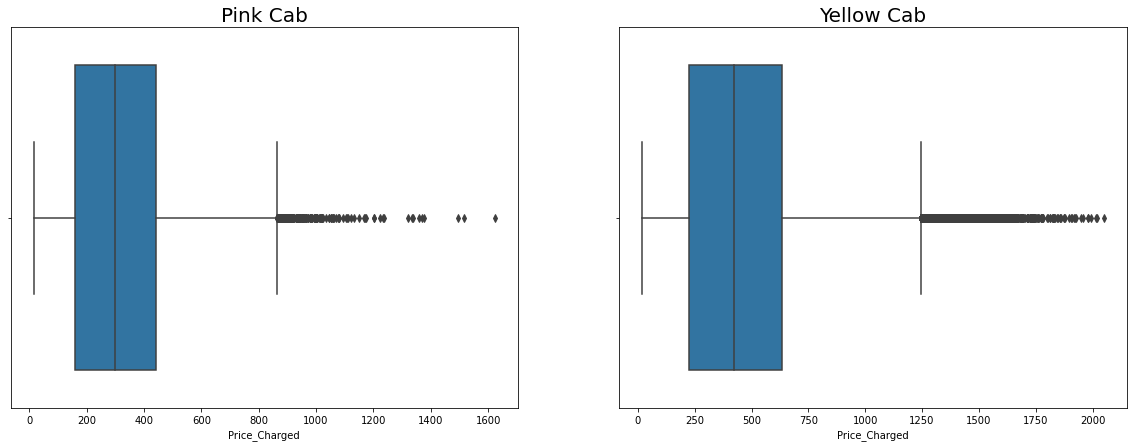

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)

In [50]:
#Outliers:
#From the above boxplots we can notice that price of rides is an outlier.But due to its importance in the calculation of the price rides , it will be preserved.
#The price charged for yellow cab is higher compared to pink cab.

C:\Users\mizoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mizoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price vs Distance in Yellow Cab')

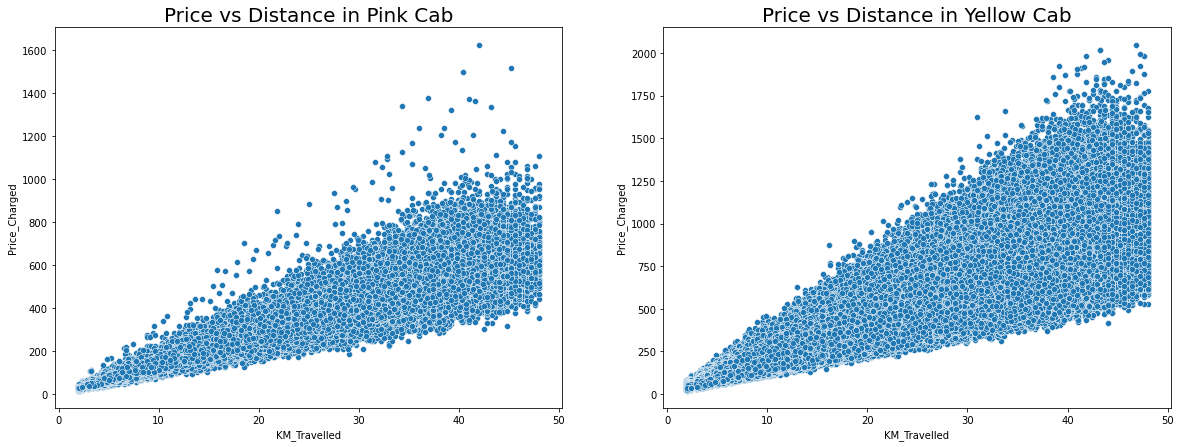

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(PinkCab['KM_Travelled'], PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
sns.scatterplot(YellowCab['KM_Travelled'], YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)


In [52]:
np.corrcoef(PinkCab['KM_Travelled'],PinkCab['Price_Charged'])

array([[1.        , 0.92776528],
       [0.92776528, 1.        ]])

In [53]:
from scipy import stats
stats.pearsonr(YellowCab['KM_Travelled'],YellowCab['Price_Charged'])

(0.8597086294478484, 0.0)

In [54]:
#From the above scatterplots we can see a positive linear correlation between the KM_Travelled variable and Price_Charged variable in both cabs.
#We can notice that this correlation is high from the pearson correlation coefficient and numpy correlation coefficient in both cabs.
#From this analysis we can say that Distance has an important impact on the price of a ride.

In [55]:
plot1 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot1

Year
2016    25080
2017    30321
2018    29310
Name: Transaction_ID, dtype: int64

In [56]:
plot2 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot2

Year
2016    82239
2017    98189
2018    94253
Name: Transaction_ID, dtype: int64

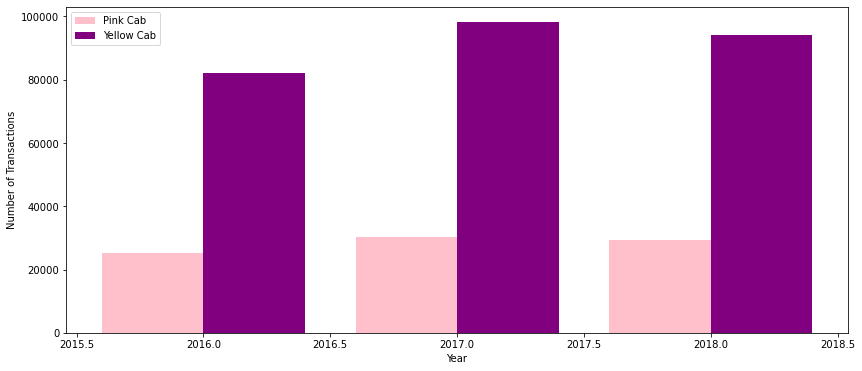

In [57]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='purple', align='center',label='Yellow Cab')
plt.ylabel('Number of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

In [58]:
#From this graph we can notice that yearly the number of transactions in Yellow cab is higher compared to Pink Cab

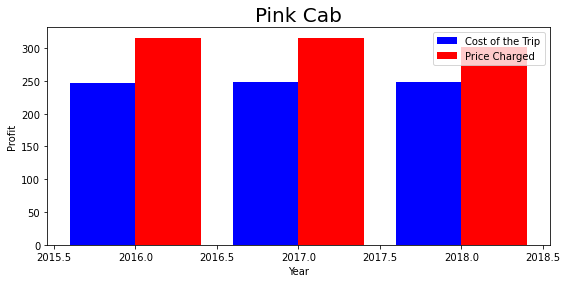

In [59]:
plot1 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

In [60]:
cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

Year
2016    315.330113
2017    315.907442
2018    301.642530
Name: Price_Charged, dtype: float64

In [61]:
cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    247.008294
2017    248.836603
2018    248.412841
Name: Cost_of_Trip, dtype: float64

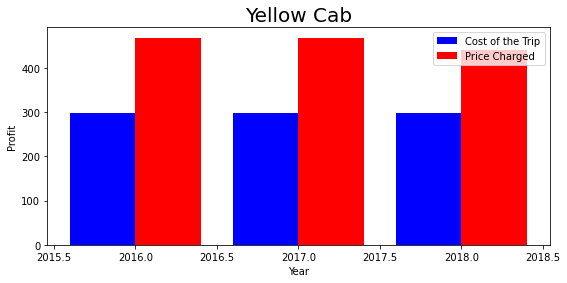

In [62]:
plot1 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

In [63]:
YellowCab.groupby('Year').Price_Charged.mean()

Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64

In [64]:
YellowCab.groupby('Year').Cost_of_Trip.mean()

Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost_of_Trip, dtype: float64

In [65]:
#From the graphs above we have that the Profit (Price Charged - Cost of Trip ) of a Yellow Cab yearly is higher compared to Pink Cab
# Yellow cab is more expensive than Pink cab
# For each graph of Pink and Yellow cabs we notice that always the Price Charged is greater than the Cost Of Trip which is normal. 

In [66]:
np.corrcoef(cab_data['KM_Travelled'],cab_data['Cost_of_Trip'])

array([[1.        , 0.98184838],
       [0.98184838, 1.        ]])

Text(0.5, 0, 'Pink Cab KM Travelled')

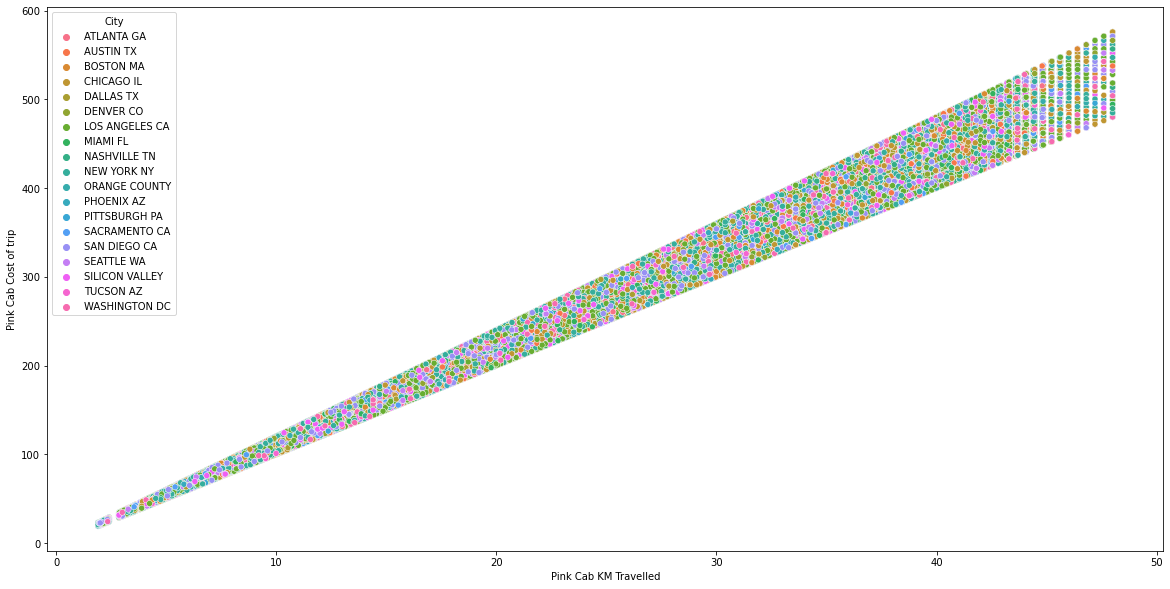

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.ylabel('Pink Cab Cost of trip')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Yellow Cab KM Travelled')

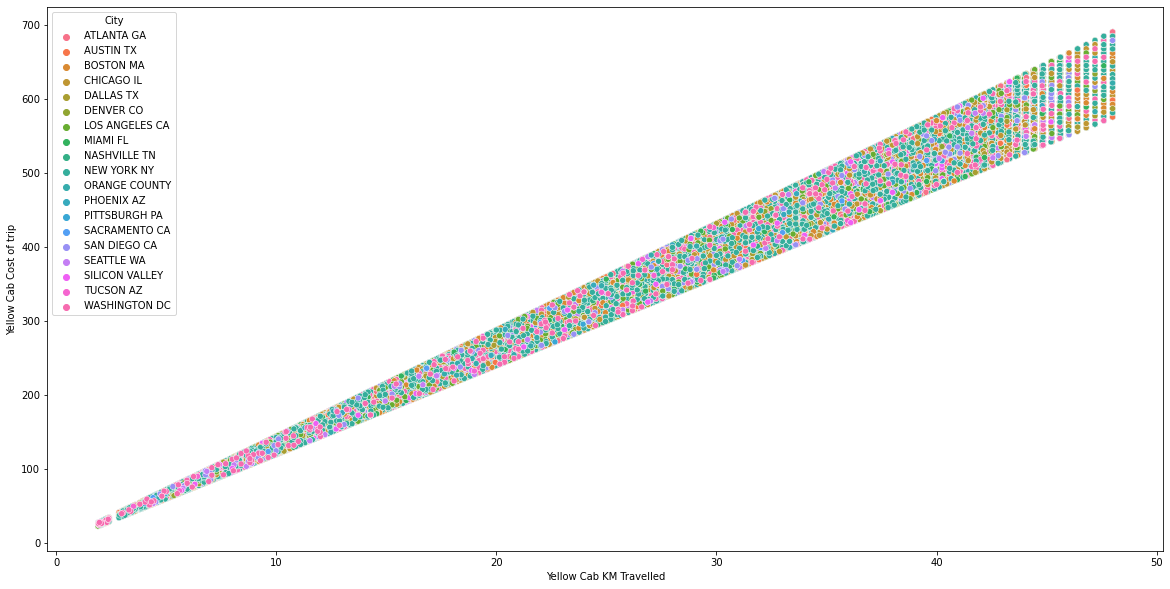

In [68]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.ylabel('Yellow Cab Cost of trip')
plt.xlabel('Yellow Cab KM Travelled')

In [69]:
#From the two plots we can notice that the cost of trip of both cabs is approximately the same.

Text(0.5, 0, 'KM Travelled in Pink Cab')

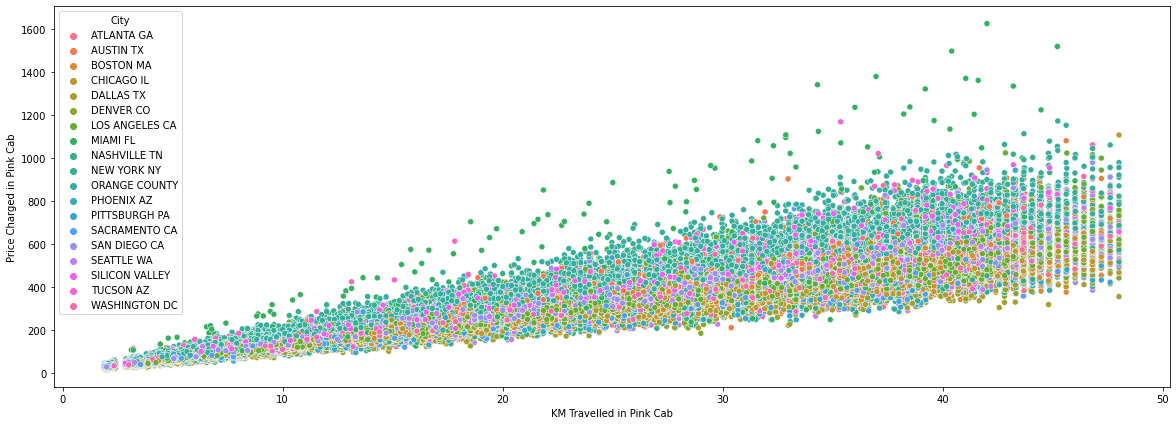

In [70]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=cab_data,x=PinkCab['KM_Travelled'],y=PinkCab['Price_Charged'],hue='City')
plt.ylabel('Price Charged in Pink Cab')
plt.xlabel('KM Travelled in Pink Cab')

Text(0.5, 0, 'KM Travelled in Yellow Cab')

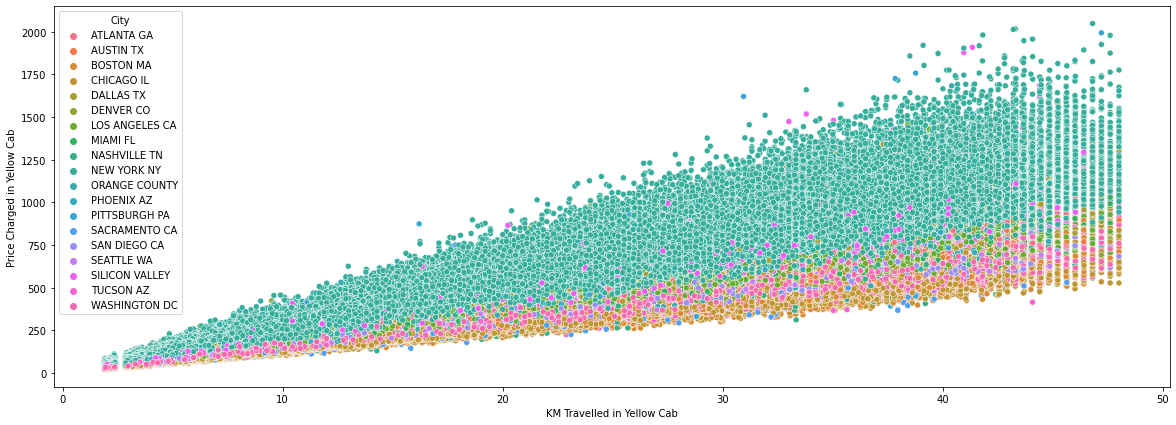

In [71]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=cab_data,x=YellowCab['KM_Travelled'],y=YellowCab['Price_Charged'],hue='City')
plt.ylabel('Price Charged in Yellow Cab')
plt.xlabel('KM Travelled in Yellow Cab')

In [72]:
#From these graphs we can see that for Yellow cab the NewYork city have the highest price of a ride compared to other cities while in Pink cab we can say that all cities have approximately the same price of a ride with the increase of distance travelled.

In [78]:
#Creating Overall Data:
left = cab_data.set_index(['Transaction_ID'])
right = trans_data.set_index(['Transaction_ID'])
data = left.join(right)
data

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,7,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,3,2016,27182,Card
...,...,...,...,...,...,...,...,...,...
10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,8,2018,52392,Cash
10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,4,2018,53286,Cash
10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,5,2018,52265,Cash


In [80]:
left = data.set_index([data.index,'Customer_ID'])
right = cust_data.set_index(['Customer_ID'])
data = left.join(right)
data


,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,7,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,3,2016,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,8,2018,Cash,Male,24,15651
10440104,53286,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,4,2018,Cash,Male,32,6528
10440105,52265,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,5,2018,Cash,Male,56,7966


In [81]:
left=data.set_index([data.index,'City'])
right=city_data.set_index(['City'])
data=left.join(right)
data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,8,2016,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,6,2016,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,2,2016,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,7,2016,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,3,2016,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,8,2018,Cash,Male,24,15651,"418,859","127,001"
10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,4,2018,Cash,Male,32,6528,"418,859","127,001"
10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,5,2018,Cash,Male,56,7966,"418,859","127,001"


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 48.2+ MB


In [88]:
data=data.reset_index()

In [89]:
data=data.rename(columns={'Income_(USD/Month)':'Income'})

In [90]:
data.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,8,2016,Card,Male,28,10813,"814,885","24,701"
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,6,2016,Card,Male,27,9237,"814,885","24,701"
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,2,2016,Cash,Male,53,11242,"814,885","24,701"
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,7,2016,Cash,Male,23,23327,"814,885","24,701"
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,3,2016,Card,Male,33,8536,"814,885","24,701"


In [93]:
city_users=data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [94]:
city_y = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

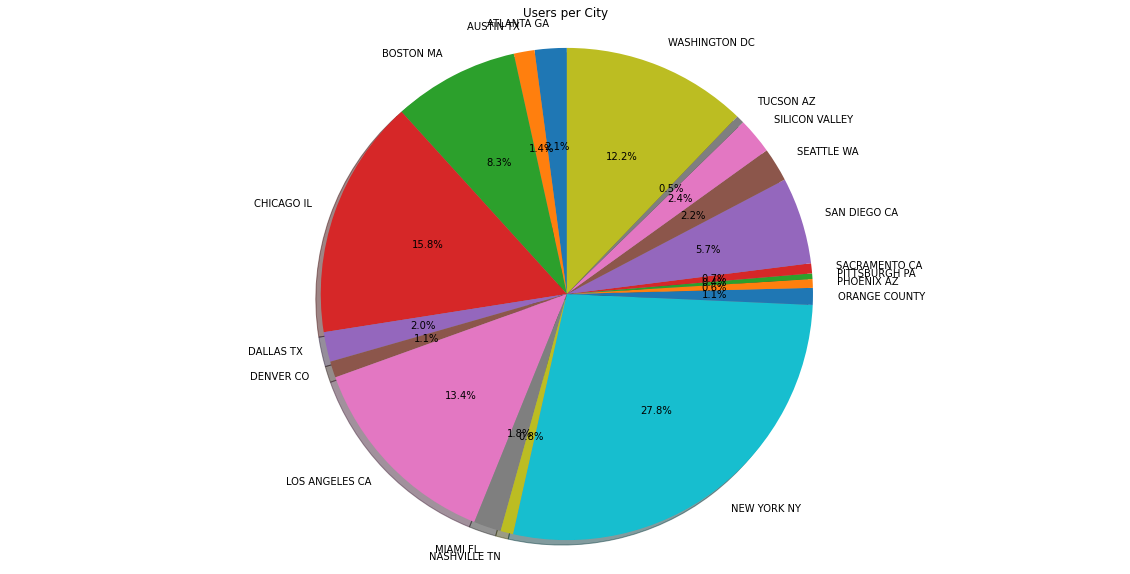

In [98]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

In [99]:
#From the above pie graph we notice that New yorl have the highest Cab users (about 28%) then it follows New York Chicago with app 16%the Los Angeles with 13.5%

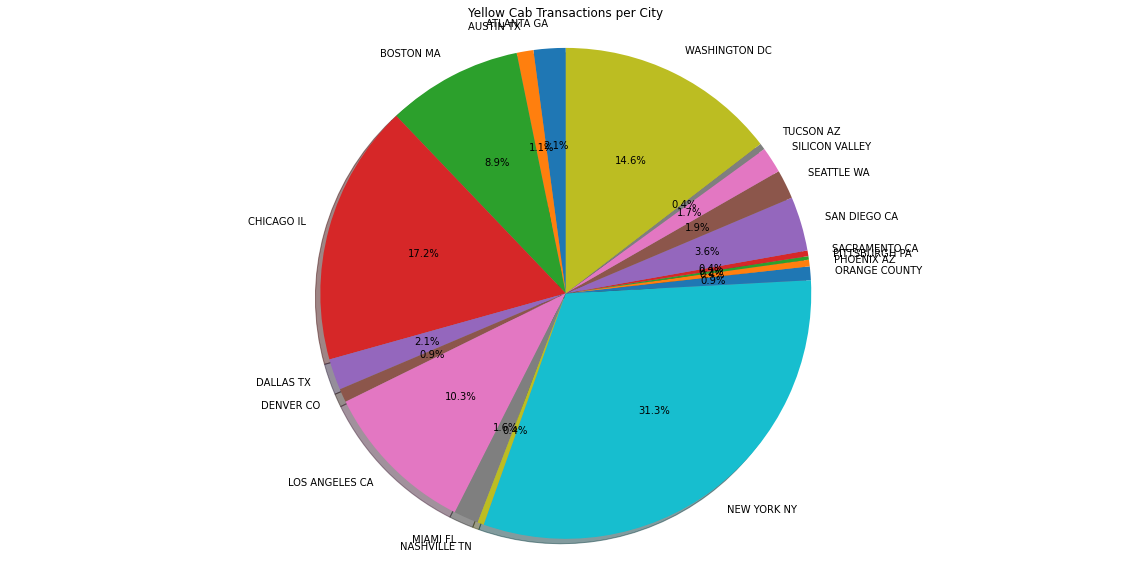

In [113]:
labs=city_y.index
vals=city_y.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals,labels=labs,autopct='%1.1f%%',shadow=True, startangle=90)
axp.axis('equal')
plt.title('Yellow Cab Transactions per City')
plt.show()

In [114]:
city_p=data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

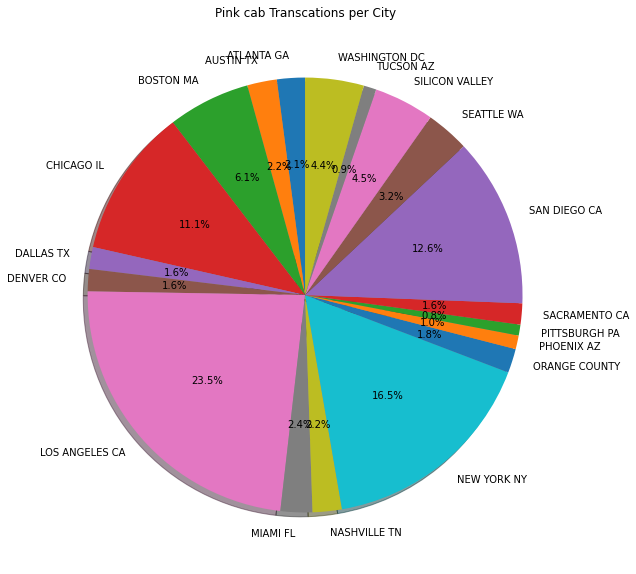

In [115]:
labs=city_p.index
vals=city_p.values
figp,axp=plt.subplots(figsize=(20,10))
axp.pie(vals,labels=labs,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Pink cab Transcations per City')
plt.show()

In [116]:
#From the above pie charts we can see that:
# for yellow cab New York city has the highest number of transaction which contains the highest users about 28%
# for pink cab Los Angelescity has the highest number of transaction

In [124]:
y=data[data.Company=='Yellow Cab'].groupby('Gender').Transaction_ID.count()
y

Gender
Female    116000
Male      158681
Name: Transaction_ID, dtype: int64

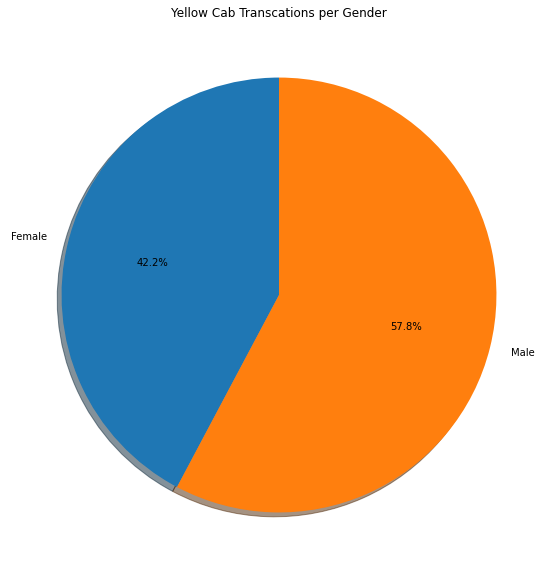

In [125]:
labs=y.index
vals=y.values
figp,axp=plt.subplots(figsize=(20,10))
axp.pie(vals,labels=labs,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Yellow Cab Transcations per Gender')
plt.show()

In [126]:
p=data[data.Company=='Pink Cab'].groupby('Gender').Transaction_ID.count()
p

Gender
Female    37480
Male      47231
Name: Transaction_ID, dtype: int64

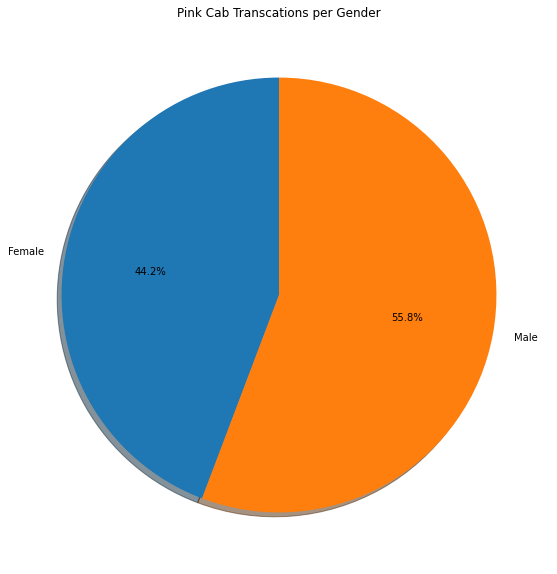

In [127]:
labs=p.index
vals=p.values
figp,axp=plt.subplots(figsize=(20,10))
axp.pie(vals,labels=labs,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Pink Cab Transcations per Gender')
plt.show()

In [128]:
# From the above pie charts we notice that for both cabs there is app same number of males and females .

In [129]:
gender_y=data[data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_y

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

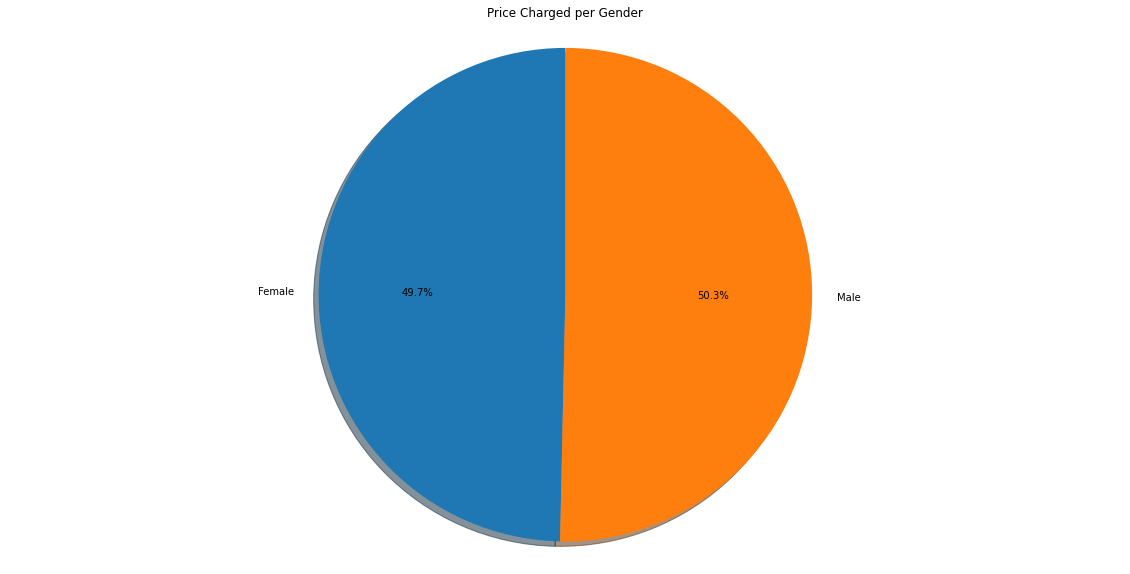

In [130]:
labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Price Charged per Gender for Yellow cab')
plt.show()

In [131]:
gender_p=data[data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_p

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

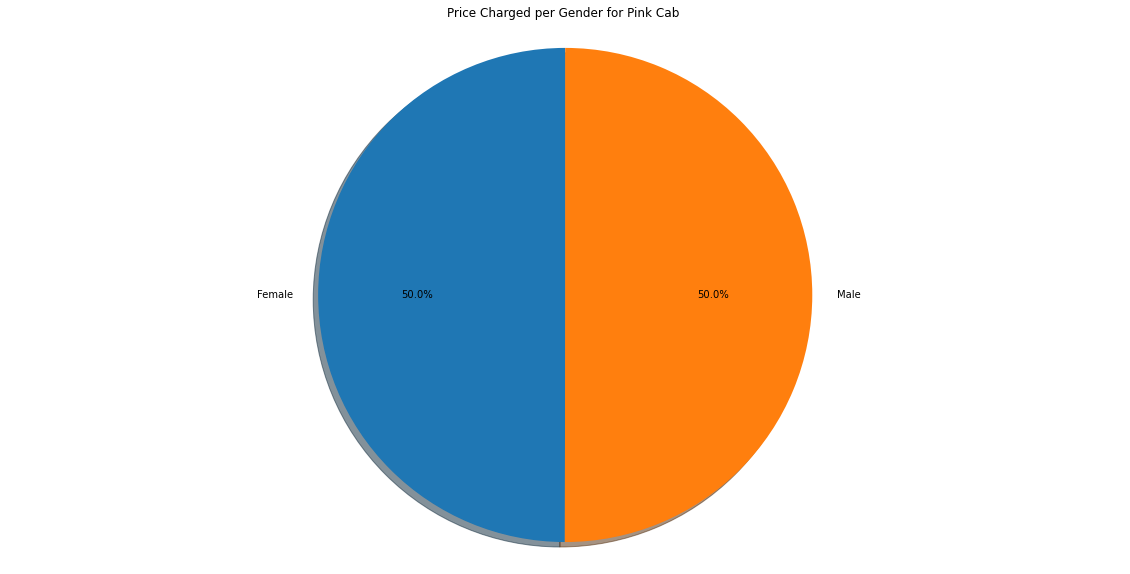

In [132]:
labs = gender_p.index
vals = gender_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Price Charged per Gender for Pink Cab ')
plt.show()

In [136]:
# we can notice that the price of a ride is equal for males and females in Pink cab users while it is less for female users in Yellow cab

In [137]:
data['Margins'] = (data['Price_Charged']-data['Cost_of_Trip'])

In [138]:
data.head(6)

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Margins
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,8,2016,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,6,2016,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,2,2016,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,7,2016,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,3,2016,Card,Male,33,8536,"814,885","24,701",16.844
5,10000016,27318,ATLANTA GA,Pink Cab,6.06,72.43,63.024,7,2016,Cash,Male,25,13984,"814,885","24,701",9.406


In [139]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income,Margins
0,30.45,370.95,313.6350,8,2016,28,10813,57.3150
1,28.62,358.52,334.8540,6,2016,27,9237,23.6660
2,9.04,125.20,97.6320,2,2016,53,11242,27.5680
3,33.17,377.40,351.6020,7,2016,23,23327,25.7980
4,8.73,114.62,97.7760,3,2016,33,8536,16.8440
...,...,...,...,...,...,...,...,...
359387,4.80,69.24,63.3600,8,2018,24,15651,5.8800
359388,8.40,113.75,106.8480,4,2018,32,6528,6.9020
359389,27.75,437.07,349.6500,5,2018,56,7966,87.4200
359390,8.80,146.19,114.0480,5,2018,32,6423,32.1420


In [140]:
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income,Margins
KM_Travelled,1.000000,0.835753,0.981848,0.001033,-0.001072,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.036288,-0.036409,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.002720,-0.001773,-0.000189,-0.000633,0.486056
Month,0.001033,-0.036288,-0.002720,1.000000,-0.007440,-0.000095,0.000536,-0.059428
Year,-0.001072,-0.036409,-0.001773,-0.007440,1.000000,-0.000579,-0.001617,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.000095,-0.000579,1.000000,0.003907,-0.005093
Income,-0.000544,0.003228,-0.000633,0.000536,-0.001617,0.003907,1.000000,0.006148
Margins,0.462768,0.864154,0.486056,-0.059428,-0.060567,-0.005093,0.006148,1.000000


<AxesSubplot:>

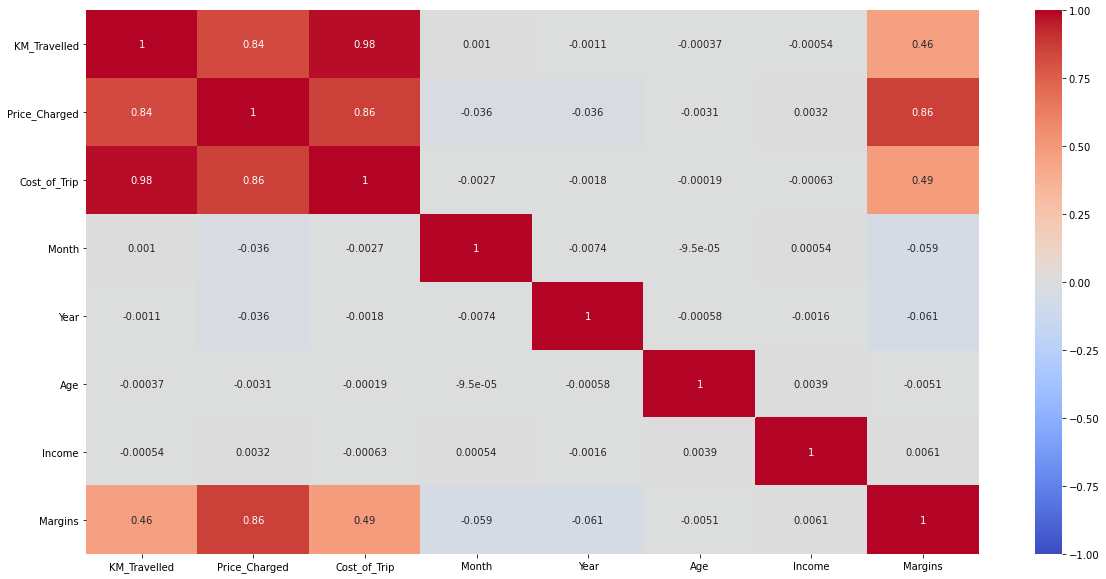

In [141]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [142]:
# There is a correlation between the margins and price_charged

In [143]:
city_m = data[data.Month==12].groupby('City').Margins.mean()
city_m

City
ATLANTA GA         96.726936
AUSTIN TX         101.190816
BOSTON MA          64.451992
CHICAGO IL         59.283680
DALLAS TX         120.402479
DENVER CO         117.735273
LOS ANGELES CA     87.743332
MIAMI FL           94.275997
NASHVILLE TN       87.320165
NEW YORK NY       264.461976
ORANGE COUNTY      92.517510
PHOENIX AZ         78.139093
PITTSBURGH PA      69.704856
SACRAMENTO CA      38.024903
SAN DIEGO CA       74.546637
SEATTLE WA         75.192565
SILICON VALLEY    157.804003
TUCSON AZ          73.909117
WASHINGTON DC      70.734216
Name: Margins, dtype: float64

In [144]:
dt1 = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()

In [157]:
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

In [161]:
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

In [162]:
# Margins of Pink Cab:

<AxesSubplot:xlabel='Transactions_pink', ylabel='Margins_pink'>

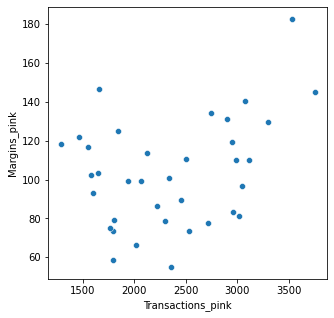

In [163]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)

In [164]:
# Pink Cabs increase their margin with the increase in number of transactions

In [171]:
# Margins of Yellow cab

<AxesSubplot:xlabel='Transactions_yellow', ylabel='Margins_yellow'>

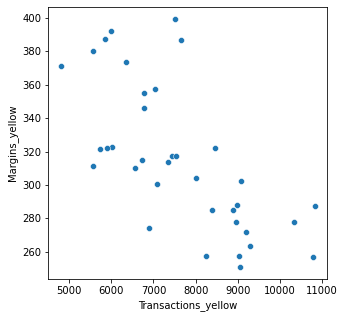

In [172]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)

In [173]:
# Yellow cabs decrease their marginswith the increase in the number of transactions.

In [196]:
# Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab:

a=data[(data.Company=='Yellow Cab')&(data.Gender=='Female')].groupby('Transaction_ID').Margins.mean()
b=data[(data.Company=='Yellow Cab')&(data.Gender=='Male')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])
from scipy import stats
_,p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
print('The p-value = ',p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
The p-value =  6.060473042494144e-25


In [197]:
# Yellow Cab: There is difference in Margin between Male and Female customers

In [198]:
#For Pink Cabs
a = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


In [200]:
#Pink Cab: There is no difference in Margin between Male and Female customers

In [201]:
# Margin per Age:
a = data[(data.Age<=50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

71228 13483
We accept null hypothesis that theres no difference
P value is  0.32817487547980695


In [204]:
# Pink Cab: There is no difference between Margin per Ages

In [205]:
#Yellow Cab
a = data[(data.Age<=50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.494256817799368e-09


In [207]:
# Yellow Cab: There is discount for older than 50

In [208]:
#Is there difference in margins for Card payer and Cash payers

In [215]:
#Pink Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [216]:
#Yellow Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729


In [217]:
# There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab